### importing the necessary libraries

In [150]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings
import math
import plotly.graph_objects as go
sns.set_style(style="darkgrid")

### filtering out warning messages

In [4]:
warnings.filterwarnings("ignore")

### Getting path to dataset

In [6]:
current=os.getcwd()
root=os.path.dirname(current)

In [7]:
print(os.listdir(root))

['.git', '.gitattributes', '.virtual_documents', 'data', 'LICENSE', 'notebooks', 'source documents']


### getting full path to dataset

In [9]:
path=os.path.join(root,'data','data_science_competition_2024.csv')

### reading data

In [11]:
df=pd.read_csv(path)

### checking entries in data

In [13]:
df.head()

Unnamed: 0                               loan_id  gender disbursemet_date  \
0           0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29   
1           1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06   
2           2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29   
3           3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22   
4           4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08   

  currency   country     sex  is_employed      job    location  ...  \
0      USD  Zimbabwe  female         True  Teacher  Beitbridge  ...   
1      USD  Zimbabwe   other         True  Teacher      Harare  ...   
2      USD  Zimbabwe   other         True    Nurse       Gweru  ...   
3      USD  Zimbabwe  female         True   Doctor      Rusape  ...   
4      USD  Zimbabwe    male         True    Nurse    Chipinge  ...   

   number_of_defaults  outstanding_balance  interest_rate  age  \
0                   0         48653.011473           0.22   37   
1                   2         28752.062237           0.20   43   
2                   1         44797.554126           0.22   43   
3                   0         35681.496413           0.23   47   
4                   0         34156.055882           0.20   42   

   number_of_defaults.1  remaining term       salary  marital_status age.1  \
0                     0              47  3230.038869         married    37   
1                     2              62  3194.139103          single    43   
2                     1              57  3330.826656         married    43   
3                     0              42  2246.797020        divorced    47   
4                     0              45  2310.858441         married    42   

       Loan Status  
0  Did not default  
1  Did not default  
2  Did not default  
3  Did not default  
4  Did not default  

[5 rows x 21 columns]

## __Data Cleaning__

### `Unnamed` feature is unnecessary as it only indicates the index of a row in the dataset

### getting rid of the column

In [17]:
df=pd.read_csv(path,index_col=0)

In [18]:
df.head()

loan_id  gender disbursemet_date currency  \
0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29      USD   
1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06      USD   
2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29      USD   
3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22      USD   
4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08      USD   

    country     sex  is_employed      job    location  loan_amount  \
0  Zimbabwe  female         True  Teacher  Beitbridge      39000.0   
1  Zimbabwe   other         True  Teacher      Harare      27000.0   
2  Zimbabwe   other         True    Nurse       Gweru      35000.0   
3  Zimbabwe  female         True   Doctor      Rusape      24000.0   
4  Zimbabwe    male         True    Nurse    Chipinge      19000.0   

   number_of_defaults  outstanding_balance  interest_rate  age  \
0                   0         48653.011473           0.22   37   
1                   2         28752.062237           0.20   43   
2                   1         44797.554126           0.22   43   
3                   0         35681.496413           0.23   47   
4                   0         34156.055882           0.20   42   

   number_of_defaults.1 remaining term       salary marital_status  age.1  \
0                     0             47  3230.038869        married     37   
1                     2             62  3194.139103         single     43   
2                     1             57  3330.826656        married     43   
3                     0             42  2246.797020       divorced     47   
4                     0             45  2310.858441        married     42   

       Loan Status  
0  Did not default  
1  Did not default  
2  Did not default  
3  Did not default  
4  Did not default

### checking for number of rows and columns

In [20]:
rows,columns=df.shape

In [21]:
print("rows:{}\ncolumns:{}".format(rows,columns))

rows:100000
columns:20


### checking for missing values

In [23]:
df.isnull().sum()

loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

### further inspecting null columns

In [25]:
nulls=df.isnull().sum()

In [26]:
nulls=nulls[nulls>0]

In [27]:
nulls

country      100
job         4136
location     595
dtype: int64

### getting feature_names for null columns

In [29]:
null_columns=nulls.index.tolist()
null_columns

['country', 'job', 'location']

In [30]:
subset=df[null_columns]
subset.head()

country      job    location
0  Zimbabwe  Teacher  Beitbridge
1  Zimbabwe  Teacher      Harare
2  Zimbabwe    Nurse       Gweru
3  Zimbabwe   Doctor      Rusape
4  Zimbabwe    Nurse    Chipinge

### cleaning country first

In [32]:
subset.country.value_counts()

country
Zimbabwe    99787
zimbabwe      100
Zim            13
Name: count, dtype: int64

### it seems that the only value under country is Zimbabwe so will fill every missing value with `Zimbabwe`

### But first:

### __making the country codes uniform__

__converting `zimbabwe` to `Zimbabwe`__

In [37]:
subset['country']=subset.country.str.title()

__viewing changes__

In [39]:
subset.country.value_counts()

country
Zimbabwe    99887
Zim            13
Name: count, dtype: int64

__now converting `Zim` to `Zimbabwe`__

In [41]:
subset['country']=subset.country.apply(lambda x:'Zimbabwe' if x=='Zim' else x)

__viewing changes__

In [43]:
subset.country.value_counts()

country
Zimbabwe    99900
Name: count, dtype: int64

In [44]:
rows

100000

__now that all values for country are uniform,__

__filling missing values with `Zimbabwe`__

In [46]:
subset['country']=subset.country.fillna('Zimbabwe')

In [47]:
df['country']=subset.country

__getting rid of imputed feature in subset__

In [49]:
subset=subset.drop('country',axis=1)

In [50]:
subset.head()

job    location
0  Teacher  Beitbridge
1  Teacher      Harare
2    Nurse       Gweru
3   Doctor      Rusape
4    Nurse    Chipinge

__inspecting the 2 remaining null features__

In [52]:
subset.describe().transpose()

count unique       top   freq
job       95864     11  Engineer  16524
location  99405    157    Harare   8338

In [53]:
subset.job.value_counts()

job
Engineer              16524
Nurse                 15284
Data Analyst          13204
Doctor                12186
Software Developer    11932
Teacher                8950
Accountant             7802
SoftwareDeveloper      3564
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: count, dtype: int64

In [54]:
subset.location.value_counts()

location
Harare               8338
Bulawayo             8078
Mutare               8062
Gweru                7803
Masvingo             7476
                     ... 
 Redcliff               1
Victoria Falls          1
Victoria Falls          1
   Gokwe                1
Gokwe                   1
Name: count, Length: 157, dtype: int64

---

as can be seen from the above outputs, imputing with the most frequent values may not be the best way here, this is because:
- even though __engineer__ is the most frequent job title, others like __nurse,data analyst and doctor are not that far behind__
- so blindly filling in missing values based on that alone may affect the model later
- the same also applies to location
- so here will be taking a different approach to this, where missing values for job and location are imputed by job title and location of borrowers that exhibit similar characteristics

---

before imputation, will be converting textual data to numeric to enable the KNN algorithm to work

so to check the number of unique values in each to see whether one-hot encoding is applicable here

the idea is, if there are __many(let's say above 5)__ unique values in a feature, one-hot may not be a practical way to encode values since it will create a new column for each unique value in our dataset thereby consuming more memory than the original dataset

In [59]:
subset.location.nunique()

157

In [60]:
subset.job.nunique()

11

so as can be seen, one-hot encoding may not be practical here, so will be using LabelEncoding for both features

### now to get rid of duplicate columns, ie age.1 and sex,number_of_defaults.1

In [63]:
df.drop(['age.1','sex','number_of_defaults.1'],axis=1,inplace=True)

### imputing missing values in original dataset

In [65]:
missing = subset.columns.tolist()

### Now...

### before imputing missing values they need to be converted to numeric since method of imputation here will be KNNImputer, reason will be explained in succeeding cells in this notebook

__to convert these values to numeric,a preprocessor known as  LabelEncoder will be applied on textual data but there's one problem with that:__

__LabelEncoder also encodes NaN values to a numeric representation, which will cause unexpected output when inverse-transform is applied on the now textual data(ie: suppose NaN was converted to 14, upon inverse-transform, that `14` will be converted back to NaN and it will look like the KNNImputer is not working)__

__so will play around a bit with the way LabelEncoder works, to handle NaN__

In [70]:
# creatin encoders
enc1=LabelEncoder()
enc2=LabelEncoder()
# fitting encoders
enc1.fit(df[missing[0]].dropna())# adding dropna at the end to ensure that NaN is not encoded together with valid data
enc2.fit(df[missing[1]].dropna())


LabelEncoder()

### getting the original labels

In [72]:
labels1=enc1.classes_
labels2=enc2.classes_

In [73]:
labels1

array(['Accountant', 'Data Analyst', 'Data Scientist', 'Data Scintist',
       'Doctor', 'Engineer', 'Lawyer', 'Nurse', 'Software Developer',
       'SoftwareDeveloper', 'Teacher'], dtype=object)

In [74]:
labels2

array(['   Beitbridge ', '   Beitbridge   ', '   Bulawayo ',
       '   Bulawayo   ', '   Chimanimani ', '   Chimanimani   ',
       '   Chipinge ', '   Chipinge   ', '   Chiredzi ', '   Chiredzi   ',
       '   Chivhu ', '   Chivhu   ', '   Gokwe ', '   Gokwe   ',
       '   Gweru ', '   Gweru   ', '   Harare ', '   Harare   ',
       '   Kadoma ', '   Kadoma   ', '   Kariba ', '   Kariba   ',
       '   Karoi ', '   Karoi   ', '   Kwekwe ', '   Kwekwe   ',
       '   Marondera ', '   Marondera   ', '   Masvingo ',
       '   Masvingo   ', '   Mutare ', '   Mutare   ', '   Nyanga ',
       '   Nyanga   ', '   Plumtree ', '   Plumtree   ', '   Redcliff   ',
       '   Rusape ', '   Rusape   ', '   Shurugwi ', '   Shurugwi   ',
       '   Victoria Falls ', '   Zvishavane ', '   Zvishavane   ',
       ' Beitbridge ', ' Beitbridge   ', ' Bulawayo ', ' Bulawayo   ',
       ' Chimanimani ', ' Chimanimani   ', ' Chipinge ', ' Chipinge   ',
       ' Chiredzi ', ' Chiredzi   ', ' Chivhu ', ' C

### checking order of missing features

In [76]:
missing

['job', 'location']

### getting numeric encodings for job and location

In [78]:
encodings1=enc1.transform(labels1)
encodings2=enc2.transform(labels2)

### creating label-encoding pairs for job and location

In [80]:
job_dict=dict(zip(labels1,encodings1))
location_dict=dict(zip(labels2,encodings2))

In [81]:
job_dict

{'Accountant': 0,
 'Data Analyst': 1,
 'Data Scientist': 2,
 'Data Scintist': 3,
 'Doctor': 4,
 'Engineer': 5,
 'Lawyer': 6,
 'Nurse': 7,
 'Software Developer': 8,
 'SoftwareDeveloper': 9,
 'Teacher': 10}

In [82]:
encode_jobs=lambda job:job_dict.get(job)
encode_locations=lambda location:location_dict.get(location)

In [83]:
# transforming features to numeric
subset[missing[0]]=subset[missing[0]].apply(encode_jobs)
subset[missing[1]]=subset[missing[1]].apply(encode_locations)

### Now

as mentioned before, missing values will be imputed based on values from the K-Nearest Neighbors with similar characteristics(will be 5 in this case)

so the characteristics that will be considered here are only the numeric features, why:

- looking and the textual features,
- loanID,gender,country,marital status aren't really related to a person's job or where they live
- loan_status however may relate to a person's job but not where they live, so will also not include thise one

### getting only numeric names

In [86]:
numeric=df.describe().columns.tolist()

### creating a subset dataframe from the __numeric__ feature names

In [88]:
numeric=df[numeric]

In [89]:
numeric=numeric.join(subset)

In [90]:
numeric.head()

loan_amount  number_of_defaults  outstanding_balance  interest_rate  age  \
0      39000.0                   0         48653.011473           0.22   37   
1      27000.0                   2         28752.062237           0.20   43   
2      35000.0                   1         44797.554126           0.22   43   
3      24000.0                   0         35681.496413           0.23   47   
4      19000.0                   0         34156.055882           0.20   42   

        salary   job  location  
0  3230.038869  10.0      89.0  
1  3194.139103  10.0     113.0  
2  3330.826656   7.0     110.0  
3  2246.797020   4.0     145.0  
4  2310.858441   7.0      98.0

In [91]:
numeric.isnull().sum()

loan_amount               0
number_of_defaults        0
outstanding_balance       0
interest_rate             0
age                       0
salary                    0
job                    4136
location                595
dtype: int64

### Imputing

In [93]:
imputer = KNNImputer()
transformed = imputer.fit_transform(numeric)

In [ ]:
#placeholder

In [95]:
#converting transformed to a dataframe to access the imputed columns easily
transformed=pd.DataFrame(transformed,columns=numeric.columns)

In [97]:
# replacing features with missing values by ones without any missing values
for feature in missing:
    df[feature] = transformed[feature]

### checking data...

In [100]:
df[missing].head()

job  location
0  10.0      89.0
1  10.0     113.0
2   7.0     110.0
3   4.0     145.0
4   7.0      98.0

### getting a count of null values after imputing

In [102]:
df.isnull().sum()

loan_id                0
gender                 0
disbursemet_date       0
currency               0
country                0
is_employed            0
job                    0
location               0
loan_amount            0
number_of_defaults     0
outstanding_balance    0
interest_rate          0
age                    0
remaining term         0
salary                 0
marital_status         0
Loan Status            0
dtype: int64

as shown above, there are no longer null values in features: `job` and `location`

### converting the encoded features to discrete values before reversing them to their original textual values

this stage is necessary since the LabelEncoder only has integer representations for the textual values ie:

- engineer $\rightarrow$ 1
- nurse $\rightarrow$ 2
- teacher $\rightarrow$ 3
- doctor $\rightarrow$ 4
- DataAnalyst $\rightarrow$ 5

  as can be seen the textual data is represented by discrete values, so applying an inverse transform before converting the digits to discrete, would result in values like `14.5` being substituted by `NaN` since encoder has not reverse-mapping for continuos data

In [105]:
for feature in missing:
    df[feature]=df[feature].apply(math.floor)

### checking datatypes

In [107]:
df[missing].dtypes

job         int64
location    int64
dtype: object

### converting these 2 features back to textual for  further exploration

In [109]:
df[missing[0]]=enc1.inverse_transform(df[missing[0]])
df[missing[1]]=enc2.inverse_transform(df[missing[1]])

### checking null values after inverse-transform

In [112]:
df.isnull().sum()

loan_id                0
gender                 0
disbursemet_date       0
currency               0
country                0
is_employed            0
job                    0
location               0
loan_amount            0
number_of_defaults     0
outstanding_balance    0
interest_rate          0
age                    0
remaining term         0
salary                 0
marital_status         0
Loan Status            0
dtype: int64

### And Now...

In [114]:
df.head()

loan_id  gender disbursemet_date currency  \
0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29      USD   
1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06      USD   
2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29      USD   
3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22      USD   
4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08      USD   

    country  is_employed      job    location  loan_amount  \
0  Zimbabwe         True  Teacher  Beitbridge      39000.0   
1  Zimbabwe         True  Teacher      Harare      27000.0   
2  Zimbabwe         True    Nurse       Gweru      35000.0   
3  Zimbabwe         True   Doctor      Rusape      24000.0   
4  Zimbabwe         True    Nurse    Chipinge      19000.0   

   number_of_defaults  outstanding_balance  interest_rate  age remaining term  \
0                   0         48653.011473           0.22   37             47   
1                   2         28752.062237           0.20   43             62   
2                   1         44797.554126           0.22   43             57   
3                   0         35681.496413           0.23   47             42   
4                   0         34156.055882           0.20   42             45   

        salary marital_status      Loan Status  
0  3230.038869        married  Did not default  
1  3194.139103         single  Did not default  
2  3330.826656        married  Did not default  
3  2246.797020       divorced  Did not default  
4  2310.858441        married  Did not default

### as can be seen here, location and job have been converted back to textual

.

In [116]:
df.head()

loan_id  gender disbursemet_date currency  \
0  8d05de78-ff32-46b1-aeb5-b3190f9c158a  female       2022 10 29      USD   
1  368bf756-fcf2-4822-9612-f445d90b485b   other       2020 06 06      USD   
2  6e3be39e-49b5-45b5-aab6-c6556de53c6f   other       2023 09 29      USD   
3  191c62f8-2211-49fe-ba91-43556b307871  female       2022 06 22      USD   
4  477cd8a1-3b01-4623-9318-8cd6122a8346    male       2023 02 08      USD   

    country  is_employed      job    location  loan_amount  \
0  Zimbabwe         True  Teacher  Beitbridge      39000.0   
1  Zimbabwe         True  Teacher      Harare      27000.0   
2  Zimbabwe         True    Nurse       Gweru      35000.0   
3  Zimbabwe         True   Doctor      Rusape      24000.0   
4  Zimbabwe         True    Nurse    Chipinge      19000.0   

   number_of_defaults  outstanding_balance  interest_rate  age remaining term  \
0                   0         48653.011473           0.22   37             47   
1                   2         28752.062237           0.20   43             62   
2                   1         44797.554126           0.22   43             57   
3                   0         35681.496413           0.23   47             42   
4                   0         34156.055882           0.20   42             45   

        salary marital_status      Loan Status  
0  3230.038869        married  Did not default  
1  3194.139103         single  Did not default  
2  3330.826656        married  Did not default  
3  2246.797020       divorced  Did not default  
4  2310.858441        married  Did not default

## __Basic EDA (Exploratory Data Analysis)__:

### gaining insights into feature distributions

In [118]:
df.describe()

loan_amount  number_of_defaults  outstanding_balance  interest_rate  \
count  100000.000000       100000.000000        100000.000000  100000.000000   
mean    31120.000000            0.441970         36964.909763       0.210435   
std     15895.093631            0.688286         10014.758477       0.018725   
min      1000.000000            0.000000             0.000000       0.100000   
25%     21000.000000            0.000000         29625.227472       0.200000   
50%     31000.000000            0.000000         35063.852394       0.210000   
75%     40000.000000            1.000000         42133.388817       0.220000   
max    273000.000000            2.000000        150960.000000       0.300000   

                age         salary  
count  100000.00000  100000.000000  
mean       43.57069    2781.804324  
std         4.86376     696.450055  
min        21.00000     250.000000  
25%        40.00000    2273.929349  
50%        44.00000    2665.441567  
75%        47.00000    3146.577655  
max        65.00000   10000.000000

### Intepretation:

### gaining insights into feature correlations

In [126]:
numeric=df.describe().columns.tolist()

<Axes: >

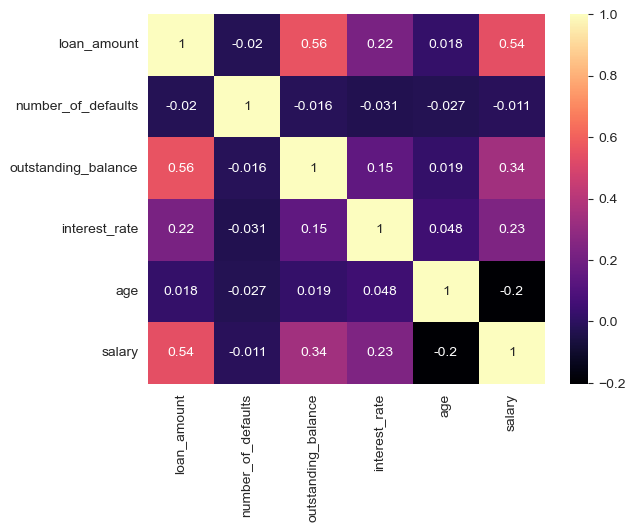

In [128]:
sns.heatmap(df[numeric].corr(),cmap='magma',annot=True)

### Intepretation

### gaining insights on potential patterns

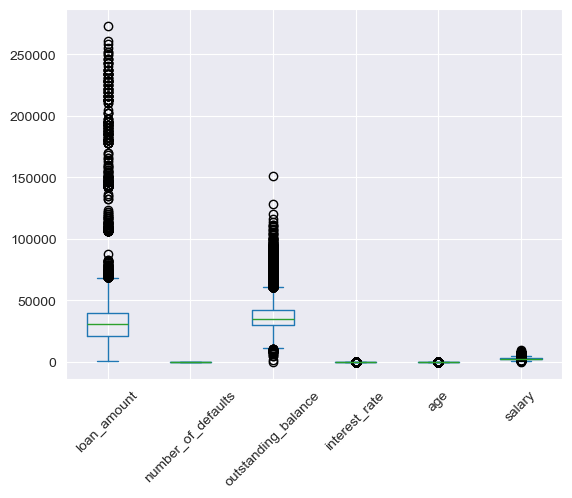

In [142]:
df[numeric].plot.box()
plt.xticks(rotation=45);# semicolon prevents a bunch of unwated text from appearing above graph

### Intepretation:
`points`

- outliers in loan amount
- low number of defaults
- outstanding balance having more outliers above the minimum than outliers below minimum

#### further exploration of patterns

In [148]:
numeric

['loan_amount',
 'number_of_defaults',
 'outstanding_balance',
 'interest_rate',
 'age',
 'salary']

#### does `loan_amount` and `interest_rate` have any bearing on `number_of_defaults`?

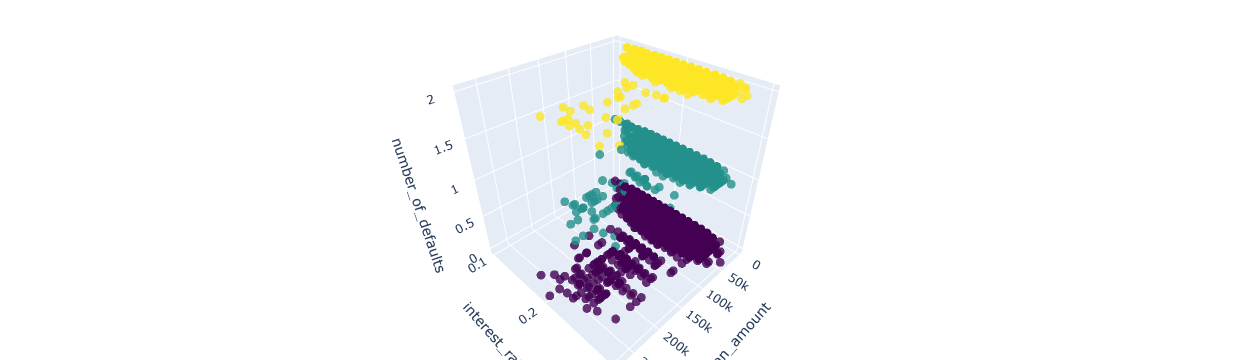

In [174]:
x,y,z=df['loan_amount'],df['interest_rate'],df['number_of_defaults']

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,
        colorscale='Viridis',
        opacity=0.8
    )
)])


fig.update_layout(
    scene={
        'xaxis_title': 'loan_amount',
        'yaxis_title': 'interest_rate',
        'zaxis_title': 'number_of_defaults'
    },
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

fig.show()